In [23]:
# package importing
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Point

In [24]:
# data importing
charterDF = pd.read_csv('./charters_parsed_03-04_no-text_SMALL.csv')
districtDF = pd.read_csv('./ACS_2014_school-district-unified_SMALL.csv', encoding='latin-1')
publicDF = pd.read_csv('./pub_merged_2015_withSDlvPVI.csv')
district = gpd.read_file('district.shp')

/Users/harshayugirase/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/harshayugirase/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,2,3,5,7,9,10,11,12,13,17,18,19,20,21,25,26,28,29,30,31,32,33,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,5

In [25]:
# merging, if you want.
districtDF['NAME'] = districtDF['Qualifying Name'].apply(lambda x: ",".join(x.split(",")[:-1]).strip())
district_df = pd.merge(districtDF, district, on="NAME")
district_df = gpd.GeoDataFrame(district_df)

temppublicDF = None
tempcharterDF = None
tempdistrict_df = None

In [26]:
#input a list in the form [upperleft longitude, upperleft lat, lowerleft longitude, lowerleft latitude]
def createBoundingBox(boundingBox):
    global publicDF
    global charterDF
    global district_df
    
    ULLON = boundingBox[0]
    ULLAT = boundingBox[1]
    LRLON = boundingBox[2]
    LRLAT = boundingBox[3]
    
    publicDF = publicDF[publicDF['LON1516']>ULLON]
    publicDF= publicDF[publicDF['LAT1516']<ULLAT]
    publicDF = publicDF[publicDF['LON1516']<LRLON]
    publicDF = publicDF[publicDF['LAT1516']>LRLAT]
    charterDF = charterDF[charterDF['LONGCODE']>ULLON]
    charterDF = charterDF[charterDF['LATCODE']<ULLAT]
    charterDF = charterDF[charterDF['LONGCODE']<LRLON]
    charterDF = charterDF[charterDF['LATCODE']>LRLAT]

    validDistricts = ""
    for index, row in publicDF.iterrows():
        try:
            validDistricts += str(int(publicDF["LEAID"][index])) + " "
        except:
            hi = 'hi'

    dropList = []
    for index, row in district_df.iterrows():
        #district_df.drop(district_df.index[index], inplace=True)
        try:
            if ((str(int(district_df["FIPS"][index]))) not in validDistricts):
                dropList.append(index)
        except:
            hi = 'hi'
    district_df = district_df.drop(dropList)

In [27]:
bayArea = [-123.26482826886195, 38.66436310541212, -121.06756264386195, 37.12821658249273]

createBoundingBox(bayArea)
district_df

,FIPS,Name of Area,Qualifying Name,State/U.S.-Abbreviation (USPS),Summary Level,Geographic Component,File Identification,Logical Record Number,US,Region,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GISJOIN,Shape_Leng,Shape_Area,% Total Po,geometry
1453,0600019,"Dublin Unified School District, California","Dublin Unified School District, California",ca,970,00,ACSSF,0040098,NaN,NaN,...,E,35426071.0,0.0,+37.7153770,-121.9104967,G06000019,37799.106445,3.542606e+07,51.76,"(POLYGON ((-2235995.2443 329544.7997999992, -2..."
1454,0600020,"Pleasanton Unified School District, California","Pleasanton Unified School District, California",ca,970,00,ACSSF,0040099,NaN,NaN,...,E,102460910.0,391116.0,+37.6649739,-121.8867095,G06000020,58631.121814,1.028520e+08,94.96,"POLYGON ((-2229697.0096 327679.7281999998, -22..."
1455,0600021,"Sunol Glen Unified School District, California","Sunol Glen Unified School District, California",ca,970,00,ACSSF,0040100,NaN,NaN,...,E,244322988.0,2809642.0,+37.5511338,-121.8054596,G06000021,76479.473027,2.471326e+08,80.49,POLYGON ((-2228584.443600001 317234.8045000006...
1465,0600034,"Windsor Unified School District, California","Windsor Unified School District, California",ca,970,00,ACSSF,0040110,NaN,NaN,...,E,79504355.0,477276.0,+38.5491930,-122.8050545,G06000034,52828.730908,7.998163e+07,76.75,"POLYGON ((-2280226.1634 445700.2112000007, -22..."
1467,0600036,"Natomas Unified School District, California","Natomas Unified School District, California",ca,970,00,ACSSF,0040112,NaN,NaN,...,E,95948245.0,2823304.0,+38.6670737,-121.5671691,G06000036,54828.306707,9.877155e+07,45.17,POLYGON ((-2175513.788799999 428829.7045000009...
1474,0600044,"Healdsburg Unified School District, California","Healdsburg Unified School District, California",ca,970,00,ACSSF,0040119,NaN,NaN,...,E,145770119.0,345713.0,+38.6373850,-122.8884599,G06000044,78342.842100,1.461159e+08,76.54,"POLYGON ((-2284174.1231 457923.0056999996, -22..."
1477,0600047,"Tracy Unified School District, California","Tracy Unified School District, California",ca,970,00,ACSSF,0040122,NaN,NaN,...,E,504938787.0,27600762.0,+37.8910619,-121.4707749,G06000047,163699.130232,5.316333e+08,60.11,(POLYGON ((-2194139.802200001 359195.215800000...
1497,0601332,"Twin Rivers Unified School District, California","Twin Rivers Unified School District, California",ca,970,00,ACSSF,0040142,NaN,NaN,...,E,114082153.0,1389497.0,+38.6727995,-121.3842225,G06001332,89683.692314,1.154717e+08,57.54,"(POLYGON ((-2167406.512 419634.0886000004, -21..."
1500,0601410,"Lammersville Joint Unified School District, Ca...","Lammersville Joint Unified School District, Ca...",ca,970,00,ACSSF,0040145,NaN,NaN,...,E,60842581.0,69569.0,+37.7460948,-121.5230350,G06001410,36837.286594,6.091217e+07,40.11,"POLYGON ((-2201557.5886 333380.8332000002, -22..."
1506,0601770,"Alameda City Unified School District, California","Alameda City Unified School District, California",ca,970,00,ACSSF,0040152,NaN,NaN,...,E,27045458.0,32778370.0,+37.7419107,-122.2599139,G06001770,48864.867584,2.722580e+07,49.11,(POLYGON ((-2262129.186799999 342248.051699999...


In [28]:
# ess_lean
charterDF['ess_lean'] = charterDF['ess_strength'] - charterDF['prog_strength']
charterDF = charterDF.dropna(subset=["ess_lean"])
high = charterDF['ess_lean'].quantile(.98)
low = charterDF['ess_lean'].quantile(.02)
charterDF = charterDF[(charterDF['ess_lean'] < high) & (charterDF['ess_lean'] > low)]

In [29]:
# creating geometry for charter schools
charterDF['geometry'] = charterDF[['LONGCODE', 'LATCODE']].apply(lambda row:
              Point(row["LONGCODE"], row["LATCODE"]), axis=1)
charterDF = gpd.GeoDataFrame(charterDF)
charterDF.crs = {'init' :'epsg:4326'}
charterDF = charterDF.to_crs(district.crs)

In [34]:
def plot(district_col, whole=True, state="", ab=""):
    # plots the thingies
    # district_col: which column to color districts by
    # whole: True if we want to plot the whole USA. if false, plot based on state, abbreviation of that state
    figsize = (14, 7) if whole else (10,7)
    fig, ax = plt.subplots(figsize=figsize)
    new_df = district_df
    if not whole:
        new_df = new_df[new_df['State/U.S.-Abbreviation (USPS)'] == ab]
    new_df = new_df[[district_col, 'geometry']].dropna()
    new_df[district_col] = new_df[district_col].apply(float)
    new_df.plot(ax = ax, column=district_col, cmap='PiYG', linewidth=0, legend=True)
    charterDF[whole | (charterDF['STATENAME'] == state)].plot(ax = ax, cmap="coolwarm", column="ess_lean", markersize=20, linewidth=0, legend=True)
    ax.legend()
    plt.show()

/Users/harshayugirase/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


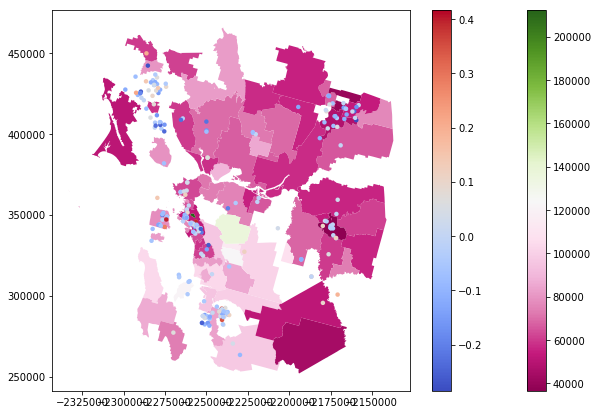

In [35]:
plot('Median household income (In 2014 Inflation Adjusted Dollars)', False, 'CALIFORNIA', 'ca') 
#if bounding boxes created, need only one parameter. Like so:
#plot('Median household income (In 2014 Inflation Adjusted Dollars)') 

#leaving it as false and a state will plot that state only.
#leaving it as false and no state will plot the whole US
#once you create a bounding box, rerun the notebook (need full dataframes again)

#the first parameter of the plot function is what the chlorpleth part of the map is made of. The dots are 
#the ESS_LEAN variable

/Users/harshayugirase/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


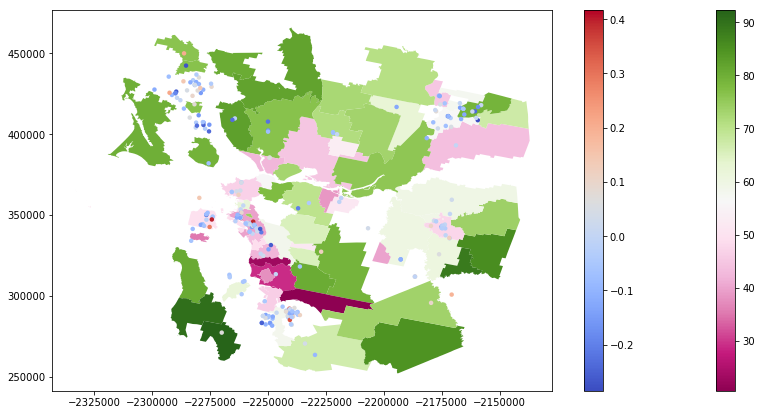

In [36]:
plot('% Total Population: White Alone')

/Users/harshayugirase/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


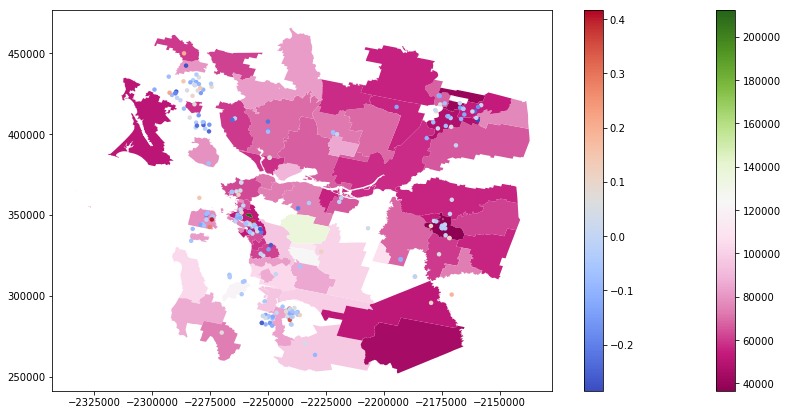

In [37]:
plot('Median household income (In 2014 Inflation Adjusted Dollars)')

/Users/harshayugirase/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


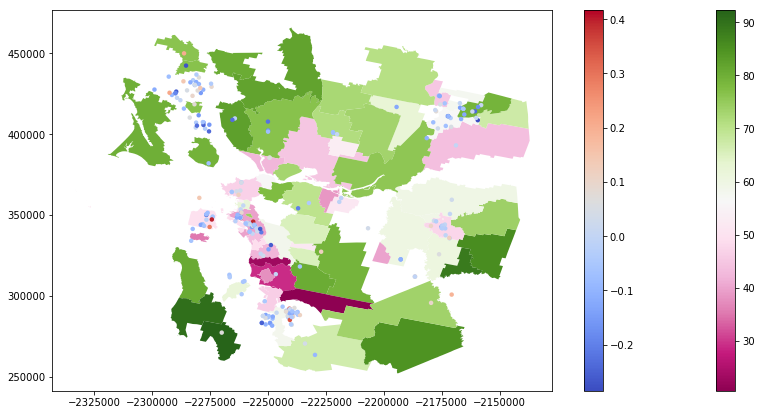

In [38]:
plot('% Total Population: White Alone')

/Users/harshayugirase/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


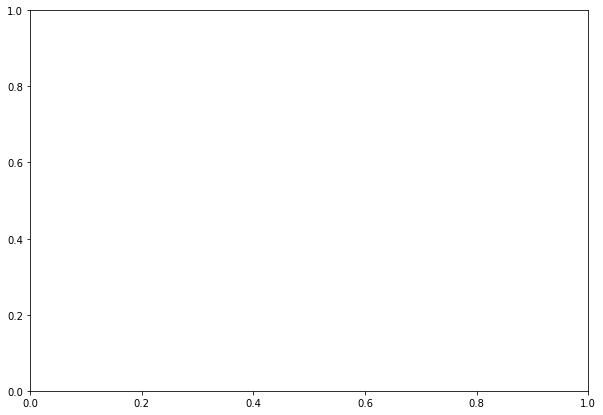

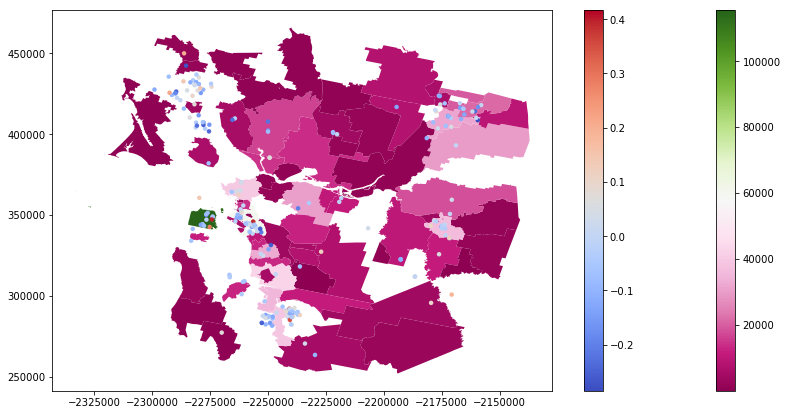

In [40]:
plot('Total Population: Foreign Born: Not a Citizen')